# Homework 1 Behavior Cloning

In [12]:
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from os import path as osp

## 1 Behavior Cloning 

In [19]:
hidden_sizes = np.array(
    [16, 32, 64, 128, 256, 512], dtype="int16"
)
data = pd.DataFrame(columns=['Hidden Size', 'Returns'])
for hs in hidden_sizes:
    with open(osp.join('../hw1_code/data', f'eval_returns_Ant-v4_{hs:d}.pkl'),
              mode='rb') as fp:
        returns = pickle.load(fp)
    sub_df = pd.DataFrame({'Hidden Size': [hs] * len(returns),
                           'Returns': returns})
    data = pd.concat([data, sub_df], axis=0)
data

,Hidden Size,Returns
0,16,2794.620117
1,16,3151.210449
2,16,456.774109
3,16,1046.123901
4,16,48.178089
...,...,...
49,512,233.255844
50,512,2838.596191
51,512,1417.242310
52,512,969.833374


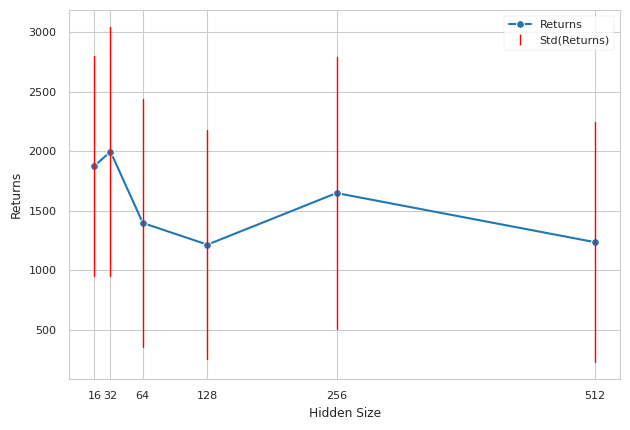

In [36]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Noto Serif']
fig, ax = plt.subplots(1, 1)
ax = sns.lineplot(data=data, x='Hidden Size', y='Returns',
                  marker='o', linewidth=1.5, ax=ax,
                  errorbar='sd', err_style='bars', label='Returns',
                  err_kws={'ecolor': 'red',
                           'linewidth': 1.0,
                           'label': 'Std(Returns)'})
ax.set_xticks(hidden_sizes)
fig.tight_layout()
fig.savefig('img/q_1_3.png', dpi=600)

## 2 DAgger

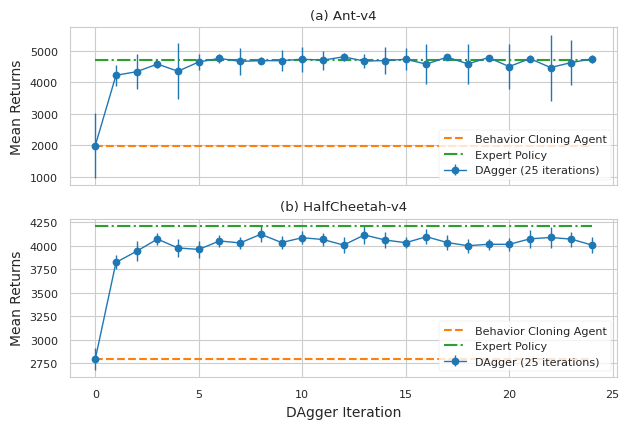

In [64]:
dtype_map = {
    'Wall time': np.float32,
    'Step': np.uint8,
    'Value': np.float32
}
mean_ret = pd.read_csv('data/q2_bc_ant_Ant-v4_10-09-2022_11-48-38_mean_returns.csv',
                       sep=',', encoding='utf-8', dtype=dtype_map)
std_ret = pd.read_csv('data/q2_bc_ant_Ant-v4_10-09-2022_11-48-38_std_returns.csv',
                      sep=',', encoding='utf-8')

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].errorbar(mean_ret['Step'], mean_ret['Value'], yerr=std_ret['Value'],
            lw=1.0, label='DAgger (25 iterations)', marker='o')
axes[0].plot(mean_ret['Step'], [1996.586669921875] * len(mean_ret['Step']),
        '--', lw=1.5, label='Behavior Cloning Agent')
axes[0].plot(mean_ret['Step'], [4713.6533203125] * len(mean_ret['Step']),
        '-.', lw=1.5, label='Expert Policy')
axes[0].set_ylabel('Mean Returns',
              fontdict={'family': 'sans-serif',
                        'size': 10}
            )
axes[0].legend(loc='lower right')
axes[0].set_title('(a) Ant-v4')

mean_ret = pd.read_csv('data/q2_bc_ant_HalfCheetah-v4_10-09-2022_12-26-46_mean_returns.csv', sep=',', encoding='utf-8', dtype=dtype_map)
std_ret = pd.read_csv('data/q2_bc_ant_HalfCheetah-v4_10-09-2022_12-26-46_std_returns.csv', sep=',', encoding='utf-8', dtype=dtype_map)
axes[1].errorbar(mean_ret['Step'], mean_ret['Value'], yerr=std_ret['Value'],
            lw=1.0, label='DAgger (25 iterations)', marker='o')
axes[1].plot(mean_ret['Step'], [2795.468994140625] * len(mean_ret['Step']),
        '--', lw=1.5, label='Behavior Cloning Agent')
axes[1].plot(mean_ret['Step'], [4205.7783203125] * len(mean_ret['Step']),
        '-.', lw=1.5, label='Expert Policy')
axes[1].set_xlabel('DAgger Iteration',
              fontdict={'family': 'sans-serif',
                        'size': 10,}
            )
axes[1].set_ylabel('Mean Returns',
              fontdict={'family': 'sans-serif',
                        'size': 10}
            )
axes[1].legend(loc='lower right')
axes[1].set_title('(b) HalfCheetah-v4')

fig.tight_layout()
fig.savefig('img/q_2_2.png', dpi=600)